# Tutorial on Label Transfer using MIRACLE

In [1]:
from modules.MIRACLE import MIRACLE, create_data
from modules import utils
import scanpy as sc
import numpy as np
import pandas as pd
import torch
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '2'

#### Map the reference and the query into a shared space via MIRACLE

Load a reference data and model

Load a query dataset

In [4]:
reference_data = create_data('/dev/shm/processed/atlas_new/')
query_data = create_data('/dev/shm/processed/bone_marrow_02/')
miracle = MIRACLE([reference_data, query_data], ['replay', 'curernt'])

34 subset(s) in this path {'atac': 55133, 'rna': 4044, 'adt': 260}
  subset_0 :  7361 cells ; ['atac', 'rna', 'adt']
  subset_1 :  5897 cells ; ['atac', 'rna', 'adt']
  subset_2 : 10190 cells ; ['atac', 'rna', 'adt']
  subset_3 :  9527 cells ; ['atac', 'rna', 'adt']
  subset_4 :  7325 cells ; ['atac', 'rna', 'adt']
  subset_5 :  6587 cells ; ['atac', 'rna', 'adt']
  subset_6 :  6897 cells ; ['atac', 'rna', 'adt']
  subset_7 :  6910 cells ; ['atac', 'rna', 'adt']
  subset_8 :  7137 cells ; ['atac', 'rna', 'adt']
  subset_9 :  6096 cells ; ['atac', 'rna']
 subset_10 :  7284 cells ; ['atac', 'rna']
 subset_11 :  9868 cells ; ['atac', 'rna']
 subset_12 :  9582 cells ; ['atac', 'rna']
 subset_13 : 11116 cells ; ['atac', 'rna']
 subset_14 :  2566 cells ; ['atac', 'rna']
 subset_15 :  4255 cells ; ['atac', 'adt']
 subset_16 :  5241 cells ; ['atac', 'adt']
 subset_17 :  5086 cells ; ['rna', 'adt']
 subset_18 :  3629 cells ; ['rna', 'adt']
 subset_19 :  6378 cells ; ['rna', 'adt']
 subset_20 : 

In [5]:
miracle.init_model(train_mod='continual', model_path='./result/atlas_new/offline/default/train/sp_latest.pt')

load an old model from ./result/atlas_new/offline/default/train/sp_latest.pt
Parameter number: 24.986 M


In [6]:
miracle.train(n_epoch=2000, save_path='./result/transfer_bm/train')

Training ...


34 tasks used as replay data, 1 tasks used as current training data


Loss: 8.8072: 100%|██████████| 2000/2000 [15:59:44<00:00, 28.79s/it]  


In [7]:
miracle.predict(save_dir='./result/transfer_bm/predict')

Predicting ...
Processing subset 0: ['atac', 'rna', 'adt']


100%|██████████| 29/29 [00:11<00:00,  2.51it/s]


Processing subset 1: ['atac', 'rna', 'adt']


100%|██████████| 24/24 [00:10<00:00,  2.31it/s]


Processing subset 2: ['atac', 'rna', 'adt']


100%|██████████| 40/40 [00:14<00:00,  2.83it/s]


Processing subset 3: ['atac', 'rna', 'adt']


100%|██████████| 38/38 [00:13<00:00,  2.83it/s]


Processing subset 4: ['atac', 'rna', 'adt']


100%|██████████| 29/29 [00:11<00:00,  2.51it/s]


Processing subset 5: ['atac', 'rna', 'adt']


100%|██████████| 26/26 [00:10<00:00,  2.43it/s]


Processing subset 6: ['atac', 'rna', 'adt']


100%|██████████| 27/27 [00:11<00:00,  2.40it/s]


Processing subset 7: ['atac', 'rna', 'adt']


100%|██████████| 27/27 [00:11<00:00,  2.43it/s]


Processing subset 8: ['atac', 'rna', 'adt']


100%|██████████| 28/28 [00:10<00:00,  2.67it/s]


Processing subset 9: ['atac', 'rna']


100%|██████████| 24/24 [00:11<00:00,  2.04it/s]


Processing subset 10: ['atac', 'rna']


100%|██████████| 29/29 [00:11<00:00,  2.58it/s]


Processing subset 11: ['atac', 'rna']


100%|██████████| 39/39 [00:13<00:00,  2.86it/s]


Processing subset 12: ['atac', 'rna']


100%|██████████| 38/38 [00:12<00:00,  2.96it/s]


Processing subset 13: ['atac', 'rna']


100%|██████████| 44/44 [00:14<00:00,  3.04it/s]


Processing subset 14: ['atac', 'rna']


100%|██████████| 11/11 [00:08<00:00,  1.34it/s]


Processing subset 15: ['atac', 'adt']


100%|██████████| 17/17 [00:08<00:00,  1.96it/s]


Processing subset 16: ['atac', 'adt']


100%|██████████| 21/21 [00:08<00:00,  2.34it/s]


Processing subset 17: ['rna', 'adt']


100%|██████████| 20/20 [00:03<00:00,  5.91it/s]


Processing subset 18: ['rna', 'adt']


100%|██████████| 15/15 [00:03<00:00,  4.57it/s]


Processing subset 19: ['rna', 'adt']


100%|██████████| 25/25 [00:04<00:00,  5.80it/s]


Processing subset 20: ['rna', 'adt']


100%|██████████| 24/24 [00:03<00:00,  7.15it/s]


Processing subset 21: ['rna', 'adt']


100%|██████████| 19/19 [00:03<00:00,  5.39it/s]


Processing subset 22: ['rna', 'adt']


100%|██████████| 21/21 [00:03<00:00,  6.56it/s]


Processing subset 23: ['rna', 'adt']


100%|██████████| 28/28 [00:03<00:00,  7.25it/s]


Processing subset 24: ['rna', 'adt']


100%|██████████| 24/24 [00:03<00:00,  7.71it/s]


Processing subset 25: ['rna', 'adt']


100%|██████████| 35/35 [00:03<00:00,  9.50it/s]


Processing subset 26: ['rna', 'adt']


100%|██████████| 35/35 [00:03<00:00,  9.22it/s]


Processing subset 27: ['atac', 'rna']


100%|██████████| 22/22 [00:09<00:00,  2.20it/s]


Processing subset 28: ['atac', 'rna']


100%|██████████| 20/20 [00:09<00:00,  2.12it/s]


Processing subset 29: ['rna', 'adt']


100%|██████████| 47/47 [00:04<00:00, 10.11it/s]


Processing subset 30: ['atac', 'rna', 'adt']


100%|██████████| 58/58 [00:18<00:00,  3.19it/s]


Processing subset 31: ['atac', 'rna', 'adt']


100%|██████████| 39/39 [00:13<00:00,  2.89it/s]


Processing subset 32: ['atac', 'rna', 'adt']


100%|██████████| 52/52 [00:16<00:00,  3.11it/s]


Processing subset 33: ['atac', 'rna']


100%|██████████| 28/28 [00:10<00:00,  2.59it/s]


Processing subset 34: ['atac', 'adt']


100%|██████████| 42/42 [00:12<00:00,  3.28it/s]


In [8]:
emb = miracle.read_embeddings()

Loading predicted variables ...
Loading subset 0: z, joint


100%|██████████| 29/29 [00:00<00:00, 387.92it/s]


Loading subset 1: z, joint


100%|██████████| 24/24 [00:00<00:00, 348.48it/s]


Loading subset 2: z, joint


100%|██████████| 40/40 [00:00<00:00, 383.75it/s]


Loading subset 3: z, joint


100%|██████████| 38/38 [00:00<00:00, 418.52it/s]


Loading subset 4: z, joint


100%|██████████| 29/29 [00:00<00:00, 229.54it/s]


Loading subset 5: z, joint


100%|██████████| 26/26 [00:00<00:00, 253.65it/s]


Loading subset 6: z, joint


100%|██████████| 27/27 [00:00<00:00, 392.00it/s]


Loading subset 7: z, joint


100%|██████████| 27/27 [00:00<00:00, 410.50it/s]


Loading subset 8: z, joint


100%|██████████| 28/28 [00:00<00:00, 392.56it/s]


Loading subset 9: z, joint


100%|██████████| 24/24 [00:00<00:00, 466.95it/s]


Loading subset 10: z, joint


100%|██████████| 29/29 [00:00<00:00, 391.37it/s]


Loading subset 11: z, joint


100%|██████████| 39/39 [00:00<00:00, 305.18it/s]


Loading subset 12: z, joint


100%|██████████| 38/38 [00:00<00:00, 58.88it/s] 


Loading subset 13: z, joint


100%|██████████| 44/44 [00:00<00:00, 397.83it/s]


Loading subset 14: z, joint


100%|██████████| 11/11 [00:00<00:00, 504.96it/s]


Loading subset 15: z, joint


100%|██████████| 17/17 [00:00<00:00, 362.34it/s]


Loading subset 16: z, joint


100%|██████████| 21/21 [00:00<00:00, 485.21it/s]


Loading subset 17: z, joint


100%|██████████| 20/20 [00:00<00:00, 328.68it/s]


Loading subset 18: z, joint


100%|██████████| 15/15 [00:00<00:00, 477.80it/s]


Loading subset 19: z, joint


100%|██████████| 25/25 [00:00<00:00, 368.85it/s]


Loading subset 20: z, joint


100%|██████████| 24/24 [00:00<00:00, 423.97it/s]


Loading subset 21: z, joint


100%|██████████| 19/19 [00:00<00:00, 205.08it/s]


Loading subset 22: z, joint


100%|██████████| 21/21 [00:00<00:00, 404.88it/s]


Loading subset 23: z, joint


100%|██████████| 28/28 [00:00<00:00, 403.46it/s]


Loading subset 24: z, joint


100%|██████████| 24/24 [00:00<00:00, 437.84it/s]


Loading subset 25: z, joint


100%|██████████| 35/35 [00:00<00:00, 302.49it/s]


Loading subset 26: z, joint


100%|██████████| 35/35 [00:00<00:00, 380.72it/s]


Loading subset 27: z, joint


100%|██████████| 22/22 [00:00<00:00, 272.73it/s]


Loading subset 28: z, joint


100%|██████████| 20/20 [00:00<00:00, 355.90it/s]


Loading subset 29: z, joint


100%|██████████| 47/47 [00:00<00:00, 454.86it/s]


Loading subset 30: z, joint


100%|██████████| 58/58 [00:00<00:00, 372.58it/s]


Loading subset 31: z, joint


100%|██████████| 39/39 [00:00<00:00, 360.53it/s]


Loading subset 32: z, joint


100%|██████████| 52/52 [00:00<00:00, 66.35it/s]


Loading subset 33: z, joint


100%|██████████| 28/28 [00:00<00:00, 464.61it/s]


Loading subset 34: z, joint


100%|██████████| 42/42 [00:00<00:00, 420.72it/s]


Converting to numpy ...
Converting subset 0: s, joint
Converting subset 0: z, joint
Converting subset 1: s, joint
Converting subset 1: z, joint
Converting subset 2: s, joint
Converting subset 2: z, joint
Converting subset 3: s, joint
Converting subset 3: z, joint
Converting subset 4: s, joint
Converting subset 4: z, joint
Converting subset 5: s, joint
Converting subset 5: z, joint
Converting subset 6: s, joint
Converting subset 6: z, joint
Converting subset 7: s, joint
Converting subset 7: z, joint
Converting subset 8: s, joint
Converting subset 8: z, joint
Converting subset 9: s, joint
Converting subset 9: z, joint
Converting subset 10: s, joint
Converting subset 10: z, joint
Converting subset 11: s, joint
Converting subset 11: z, joint
Converting subset 12: s, joint
Converting subset 12: z, joint
Converting subset 13: s, joint
Converting subset 13: z, joint
Converting subset 14: s, joint
Converting subset 14: z, joint
Converting subset 15: s, joint
Converting subset 15: z, joint
Conv

The true query label was generated using anthor annotation tool to validate the performance of MIRACLE.

In [77]:
label_ref = pd.read_csv('./atlas_new.csv', index_col=0)
label_query_true = pd.read_csv('single_bm_cl_mmd.csv', index_col=0).iloc[len(label_ref):]
label_query_true.index = [i.split("_")[1] for i in label_query_true.index]

In [74]:
cellnames = np.concatenate(list(reference_data.cell_names.values()))
cellnames = np.concatenate([cellnames, [i.split('_')[1] for i in list(query_data.cell_names.values())[0]]])

In [79]:
c = emb['z']['joint'][:, :32]
s = emb['s']['joint'].astype('str')
s[np.where(s!='34')[0]] = 'reference'
s[np.where(s=='34')[0]] = 'query'
adata = sc.AnnData(c)
adata.obs_names = cellnames
adata.obs['ref label'] = label_ref
adata.obs['true label'] = label_query_true
adata.obs['batch'] = s

/root/anaconda3/envs/test_env3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/root/anaconda3/envs/test_env3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


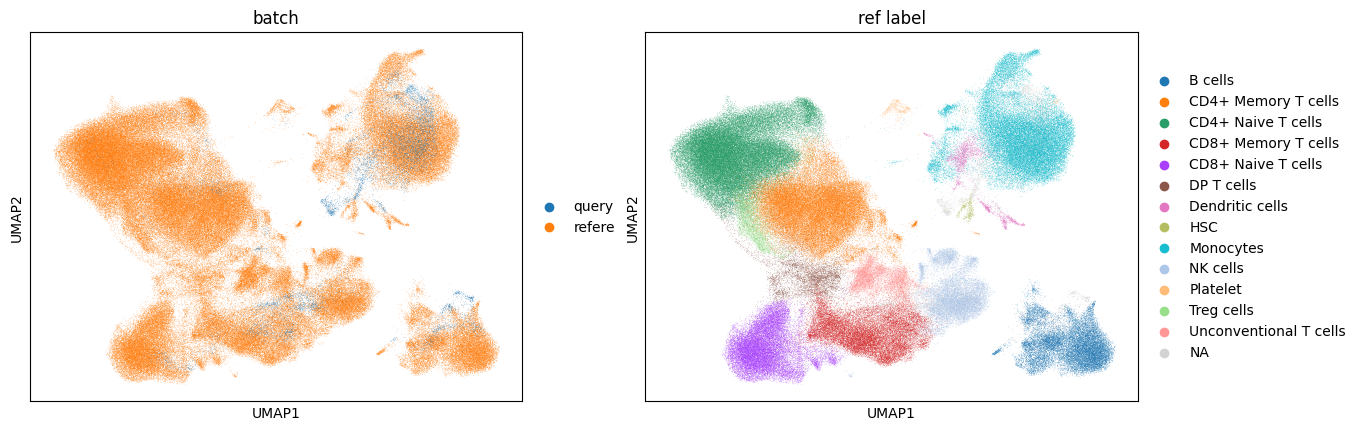

In [81]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.pl.umap(adata, color=['batch', 'ref label'])

#### Transfer label vid KNN algorithmn

After training with MIRACLE, the reference data is effectively mixed with the query data. 

We then leverage KNN algorithm to transfer labels from the reference to the query data. However, since the query data may have unknown labels, we label all query cells as "Unknown" and train the KNN model using a combination of reference and "Unknown" labels. 
This enables the annotation of cells that do not belong to any reference cell types.

In [82]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
from joblib import Parallel, delayed
import seaborn as sns
def predict_batch(X, knn_model):
    return knn_model.predict(X)

def predict_prob_batch(X, knn_model):
    return knn_model.predict_proba(X)

def knn_predict_par(X, knn_model, num_cores):
    X_batches = np.array_split(X, num_cores)
    with Parallel(n_jobs=num_cores, backend="threading") as parallel:
        results = parallel(delayed(predict_batch)(X_batch, knn_model) for X_batch in X_batches)
    return np.concatenate(results)

def knn_predict_prob_par(X, knn_model, num_cores):
    X_batches = np.array_split(X, num_cores)
    with Parallel(n_jobs=num_cores, backend="threading") as parallel:
        results = parallel(delayed(predict_prob_batch)(X_batch, knn_model) for X_batch in X_batches)
    return np.concatenate(results)

In [190]:
labels_with_unknown = np.concatenate([label_ref.values.flatten(), ['Unknown']*len(label_query_true)])
print(labels_with_unknown)
knn = KNeighborsClassifier(n_neighbors=500, weights='uniform')
knn.fit(c, labels_with_unknown)
prob_pred = knn_predict_prob_par(c[-len(label_query_true):], knn, 72)

['CD8+ Memory T cells' 'CD4+ Memory T cells' 'DP T cells' ... 'Unknown'
 'Unknown' 'Unknown']


In [191]:
prob_pred_unknown = prob_pred[:, -1]
unknown_cell = np.array([False]*len(label_query_true))
prob_pred_unknown

array([0.574, 0.13 , 0.554, ..., 0.224, 0.412, 0.112])

In [192]:
predict_label = np.unique(labels_with_unknown)[np.argmax(prob_pred,axis=1)]
predict_label

array(['Unknown', 'B cells', 'Unknown', ..., 'CD4+ Memory T cells',
       'Unknown', 'CD4+ Naive T cells'], dtype=object)

/root/anaconda3/envs/test_env3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/root/anaconda3/envs/test_env3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


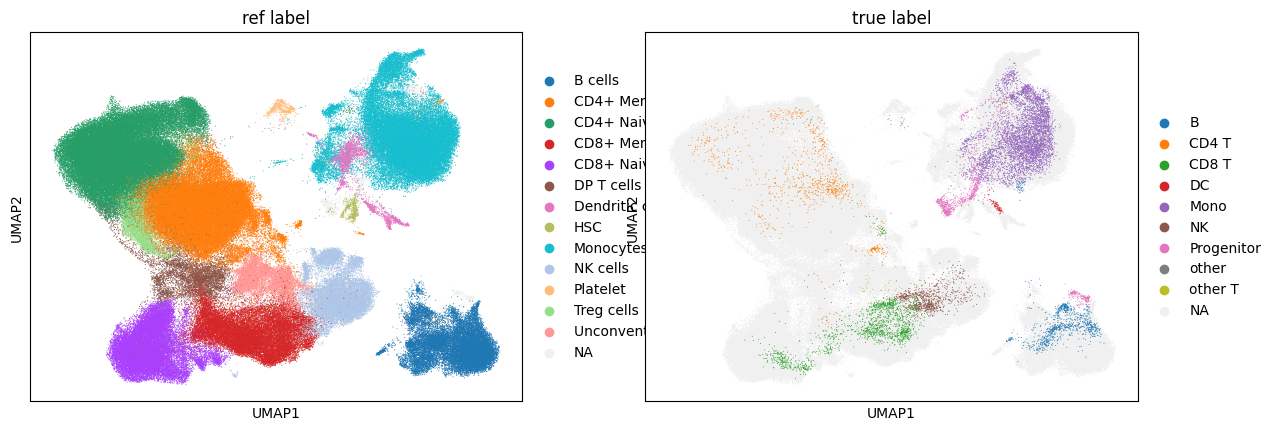

/root/anaconda3/envs/test_env3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


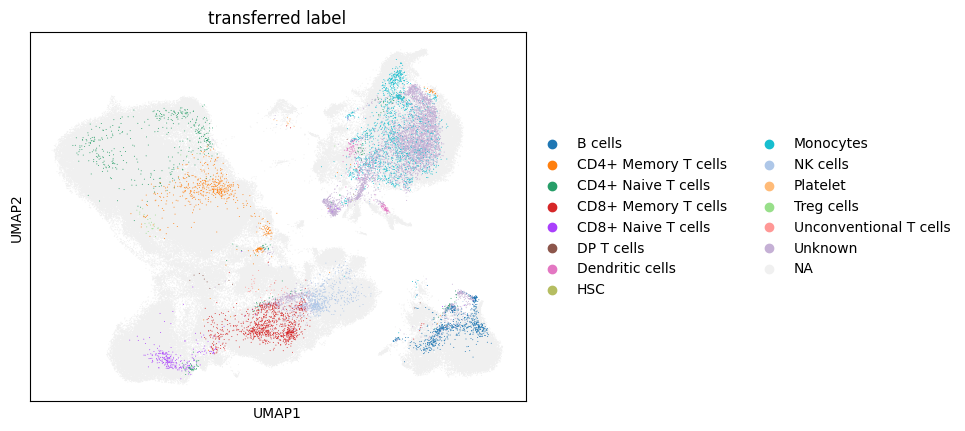

In [193]:
adata.obs['transferred label'] = pd.DataFrame(predict_label.astype('str'), index=[i.split("_")[1] for i in list(query_data.cell_names.values())[0]])
sc.pl.umap(adata, color=['ref label','true label'], na_color='#F0F0F0', size=2)
sc.pl.umap(adata, color=['transferred label'], na_color='#F0F0F0', size=2)

In [194]:
all_kinds = np.unique(np.concatenate([label_query_true.values.flatten(), predict_label]))
all_kinds

array(['B', 'B cells', 'CD4 T', 'CD4+ Memory T cells',
       'CD4+ Naive T cells', 'CD8 T', 'CD8+ Memory T cells',
       'CD8+ Naive T cells', 'DC', 'DP T cells', 'Dendritic cells', 'HSC',
       'Mono', 'Monocytes', 'NK', 'NK cells', 'Platelet', 'Progenitor',
       'Treg cells', 'Unconventional T cells', 'Unknown', 'other',
       'other T'], dtype=object)

In [195]:
np.unique(label_query_true)

array(['B', 'CD4 T', 'CD8 T', 'DC', 'Mono', 'NK', 'Progenitor', 'other',
       'other T'], dtype=object)

Text(50.722222222222214, 0.5, 'True label')

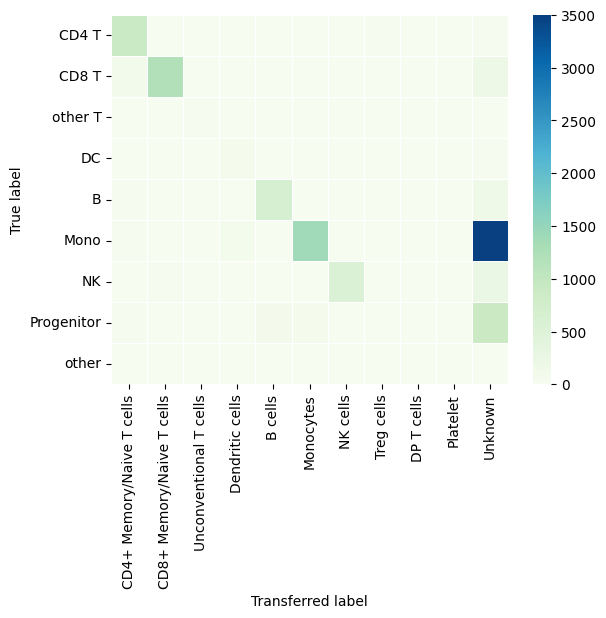

In [196]:
import matplotlib.pyplot as plt
df = pd.DataFrame(confusion_matrix(label_query_true.values.flatten(),predict_label,labels=all_kinds), index=all_kinds,columns=all_kinds).loc[np.unique(label_query_true.values.flatten()), np.unique(predict_label) ]
df.loc[:, 'CD4+ Memory/Naive T cells'] = df.loc[:, 'CD4+ Memory T cells']+ df.loc[:, 'CD4+ Naive T cells']
df.loc[:, 'CD8+ Memory/Naive T cells'] = df.loc[:, 'CD8+ Memory T cells']+ df.loc[:, 'CD8+ Naive T cells']
df = df.drop(['CD4+ Memory T cells', 'CD4+ Naive T cells', 'CD8+ Memory T cells', 'CD8+ Naive T cells'], axis=1)
# df = df / df.sum(axis=0)
df = df.loc[["CD4 T", "CD8 T", "other T", "DC", "B", "Mono", "NK", "Progenitor",  "other"], ["CD4+ Memory/Naive T cells", "CD8+ Memory/Naive T cells",  "Unconventional T cells",  "Dendritic cells", "B cells", 
"Monocytes", "NK cells",  "Treg cells", "DP T cells", "Platelet", "Unknown"]]
ax = sns.heatmap(df, linewidths=0.5,cmap="GnBu")
ax.set_xlabel('Transferred label')
ax.set_ylabel('True label')